<a href="https://colab.research.google.com/github/Vecheslav-Eremeev/keras_projects/blob/main/Keras_Datasets_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint

Load Data

In [ ]:
(X, y), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
X.shape, y.shape

((50000, 32, 32, 3), (50000, 1))

In [ ]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

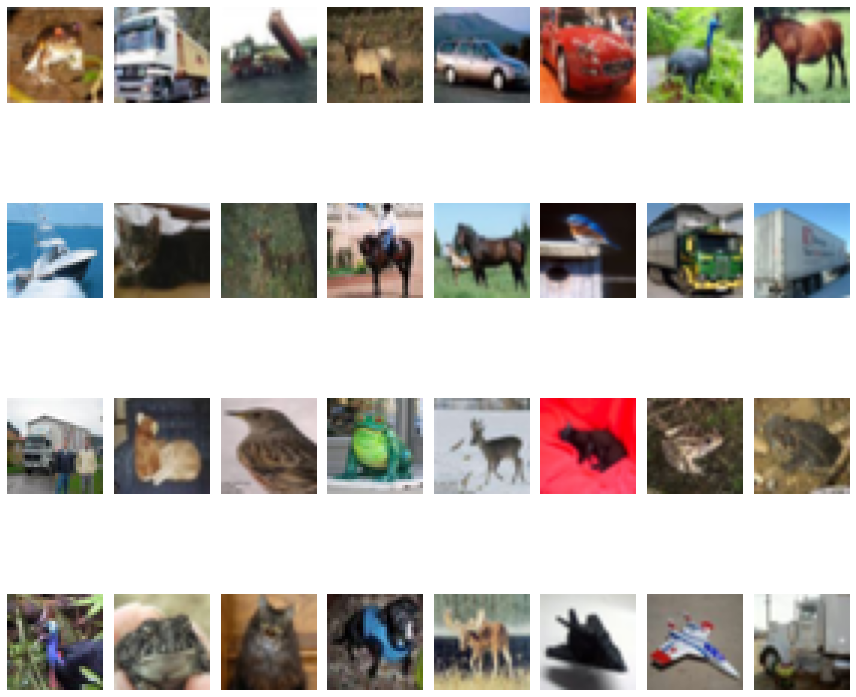

In [ ]:
plt.figure(figsize=(12,12))
for k in range(32):
    plt.subplot(4, 8, k + 1)
    plt.imshow(X[k])
    plt.axis('off')
plt.tight_layout()
plt.show()

Data preparation

In [ ]:
y = to_categorical(y)
y_test = to_categorical(y_test)

In [ ]:
X = X.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.15)

Create Model

In [ ]:
model = Sequential([
    Conv2D(64, 5, activation='relu', padding='same', input_shape=(32,32,3)),
    BatchNormalization(),
    Conv2D(64, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2),
    Dropout(0.2),
    Conv2D(128, 3, activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2),
    Dropout(0.2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        4864      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                        

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
batch_size = 128
epochs = 50

In [ ]:
callbacks_list = [
    EarlyStopping(monitor='val_acc', patience=5),
    ModelCheckpoint(filepath='my_model.h5', monitor='val_loss', save_best_only=True)
]

In [ ]:
data_gen = ImageDataGenerator(rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

In [ ]:
history = model.fit_generator(data_gen.flow(X_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(X_test, y_test),
                             steps_per_epoch = X_train.shape[0] // batch_size, callbacks=callbacks_list)

Epoch 1/50
332/332 [==============================] - 45s 105ms/step - loss: 1.8667 - acc: 0.3313 - val_loss: 2.1699 - val_acc: 0.2491
Epoch 2/50
332/332 [==============================] - 34s 103ms/step - loss: 1.5118 - acc: 0.4532 - val_loss: 1.2015 - val_acc: 0.5635
Epoch 3/50
332/332 [==============================] - 35s 104ms/step - loss: 1.3470 - acc: 0.5195 - val_loss: 1.1745 - val_acc: 0.5791
Epoch 4/50
332/332 [==============================] - 33s 100ms/step - loss: 1.2284 - acc: 0.5690 - val_loss: 1.0777 - val_acc: 0.6203
Epoch 5/50
332/332 [==============================] - 33s 100ms/step - loss: 1.1612 - acc: 0.5969 - val_loss: 1.0525 - val_acc: 0.6299
Epoch 6/50
332/332 [==============================] - 33s 98ms/step - loss: 1.1176 - acc: 0.6137 - val_loss: 1.1853 - val_acc: 0.6086
Epoch 7/50
332/332 [==============================] - 33s 100ms/step - loss: 1.0532 - acc: 0.6353 - val_loss: 1.1045 - val_acc: 0.6181
Epoch 8/50
332/332 [==============================] - 33

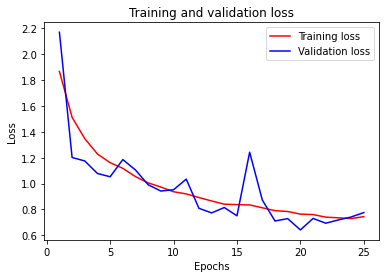

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_plot = np.arange(1, len(loss) + 1)
plt.clf()

plt.plot(epochs_plot, loss, 'r', label='Training loss')
plt.plot(epochs_plot, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

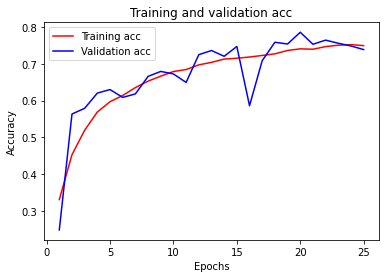

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs_plot, acc, 'r', label='Training acc')
plt.plot(epochs_plot, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model = load_model('my_model.h5')

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.6414 - acc: 0.7854


[0.6414445042610168, 0.7853999733924866]